<center><h1>DSCI-552 HOMEWORK 6</h1>
<br>
<font size="3">Name: Vorapoom Thirapatarapong</font>
<br>
<font size="3">USC ID: 4397330150 Github Username: bvorapoom</font></center>

#### import packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import roc_auc_score, roc_curve, f1_score, precision_score, recall_score
import math
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.pipeline import make_pipeline
import xgboost as xgb
from sklearn.metrics import confusion_matrix

#### load dataset

In [2]:
df_train = pd.read_csv('../data/aps_failure_training_set.csv', skiprows = 20, na_values = 'na')
df_test = pd.read_csv('../data/aps_failure_test_set.csv', skiprows = 20, na_values = 'na')

In [3]:
# mapping the class columns: neg = 0 / pos = 1
df_train['class'] = df_train['class'].replace({'pos' : 1, 'neg' : 0})
df_test['class'] = df_test['class'].replace({'pos' : 1, 'neg' : 0})

In [4]:
df_train

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0,76698,NaN,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,0,33058,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,0,41040,NaN,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,0,12,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,0,60874,NaN,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,153002,NaN,6.640000e+02,186.0,0.0,0.0,0.0,0.0,0.0,...,998500.0,566884.0,1290398.0,1218244.0,1019768.0,717762.0,898642.0,28588.0,0.0,0.0
59996,0,2286,NaN,2.130707e+09,224.0,0.0,0.0,0.0,0.0,0.0,...,10578.0,6760.0,21126.0,68424.0,136.0,0.0,0.0,0.0,0.0,0.0
59997,0,112,0.0,2.130706e+09,18.0,0.0,0.0,0.0,0.0,0.0,...,792.0,386.0,452.0,144.0,146.0,2622.0,0.0,0.0,0.0,0.0
59998,0,80292,NaN,2.130706e+09,494.0,0.0,0.0,0.0,0.0,0.0,...,699352.0,222654.0,347378.0,225724.0,194440.0,165070.0,802280.0,388422.0,0.0,0.0


In [5]:
df_test

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0,60,0.0,2.000000e+01,12.0,0.0,0.0,0.0,0.0,0.0,...,1098.0,138.0,412.0,654.0,78.0,88.0,0.0,0.0,0.0,0.0
1,0,82,0.0,6.800000e+01,40.0,0.0,0.0,0.0,0.0,0.0,...,1068.0,276.0,1620.0,116.0,86.0,462.0,0.0,0.0,0.0,0.0
2,0,66002,2.0,2.120000e+02,112.0,0.0,0.0,0.0,0.0,0.0,...,495076.0,380368.0,440134.0,269556.0,1315022.0,153680.0,516.0,0.0,0.0,0.0
3,0,59816,NaN,1.010000e+03,936.0,0.0,0.0,0.0,0.0,0.0,...,540820.0,243270.0,483302.0,485332.0,431376.0,210074.0,281662.0,3232.0,0.0,0.0
4,0,1814,NaN,1.560000e+02,140.0,0.0,0.0,0.0,0.0,0.0,...,7646.0,4144.0,18466.0,49782.0,3176.0,482.0,76.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,0,81852,NaN,2.130706e+09,892.0,0.0,0.0,0.0,0.0,0.0,...,632658.0,273242.0,510354.0,373918.0,349840.0,317840.0,960024.0,25566.0,0.0,0.0
15996,0,18,0.0,5.200000e+01,46.0,8.0,26.0,0.0,0.0,0.0,...,266.0,44.0,46.0,14.0,2.0,0.0,0.0,0.0,0.0,0.0
15997,0,79636,NaN,1.670000e+03,1518.0,0.0,0.0,0.0,0.0,0.0,...,806832.0,449962.0,778826.0,581558.0,375498.0,222866.0,358934.0,19548.0,0.0,0.0
15998,0,110,NaN,3.600000e+01,32.0,0.0,0.0,0.0,0.0,0.0,...,588.0,210.0,180.0,544.0,1004.0,1338.0,74.0,0.0,0.0,0.0


# 1. Tree-Based Methods

## 1-(b). Data Preparation
This data set has missing values. When the number of data with missing values
is significant, discarding them is not a good idea.

#### 1-(b)-i. Research what types of techniques are usually used for dealing with data with missing values.2 Pick at least one of them and apply it to this data in the next steps.

In [6]:
# check columns with missing values in the training set
df_train.isna().sum()

class         0
aa_000        0
ab_000    46329
ac_000     3335
ad_000    14861
          ...  
ee_007      671
ee_008      671
ee_009      671
ef_000     2724
eg_000     2723
Length: 171, dtype: int64

In [7]:
# function to impute missing values with non-missing mean
def impute_by_mean(df, df_train, col_exclude = ['class']):
    temp_df = df.copy()
    mean_train_nonnull = df_train.mean(axis = 0, skipna = True)
    col_to_impute = [col for col in temp_df.columns if col not in col_exclude]
    for col in col_to_impute:
        temp_nonnull_mean = mean_train_nonnull[col]
        temp_df.loc[:, col] = temp_df.loc[:, col].replace(np.nan, temp_nonnull_mean)
    return temp_df

In [8]:
# impute missing data in training set
df_train_imp = impute_by_mean(df_train, df_train)

# impute missing data in testing set - using training set mean
df_test_imp = impute_by_mean(df_test, df_train)

In [9]:
df_train_imp

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0,76698,0.713189,2.130706e+09,280.000000,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,0,33058,0.713189,0.000000e+00,190620.639314,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,0,41040,0.713189,2.280000e+02,100.000000,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,0,12,0.000000,7.000000e+01,66.000000,0.0,10.0,0.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,0,60874,0.713189,1.368000e+03,458.000000,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,153002,0.713189,6.640000e+02,186.000000,0.0,0.0,0.0,0.0,0.0,...,998500.0,566884.0,1290398.0,1218244.0,1019768.0,717762.0,898642.0,28588.0,0.0,0.0
59996,0,2286,0.713189,2.130707e+09,224.000000,0.0,0.0,0.0,0.0,0.0,...,10578.0,6760.0,21126.0,68424.0,136.0,0.0,0.0,0.0,0.0,0.0
59997,0,112,0.000000,2.130706e+09,18.000000,0.0,0.0,0.0,0.0,0.0,...,792.0,386.0,452.0,144.0,146.0,2622.0,0.0,0.0,0.0,0.0
59998,0,80292,0.713189,2.130706e+09,494.000000,0.0,0.0,0.0,0.0,0.0,...,699352.0,222654.0,347378.0,225724.0,194440.0,165070.0,802280.0,388422.0,0.0,0.0


In [10]:
df_test_imp

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0,60,0.000000,2.000000e+01,12.0,0.0,0.0,0.0,0.0,0.0,...,1098.0,138.0,412.0,654.0,78.0,88.0,0.0,0.0,0.0,0.0
1,0,82,0.000000,6.800000e+01,40.0,0.0,0.0,0.0,0.0,0.0,...,1068.0,276.0,1620.0,116.0,86.0,462.0,0.0,0.0,0.0,0.0
2,0,66002,2.000000,2.120000e+02,112.0,0.0,0.0,0.0,0.0,0.0,...,495076.0,380368.0,440134.0,269556.0,1315022.0,153680.0,516.0,0.0,0.0,0.0
3,0,59816,0.713189,1.010000e+03,936.0,0.0,0.0,0.0,0.0,0.0,...,540820.0,243270.0,483302.0,485332.0,431376.0,210074.0,281662.0,3232.0,0.0,0.0
4,0,1814,0.713189,1.560000e+02,140.0,0.0,0.0,0.0,0.0,0.0,...,7646.0,4144.0,18466.0,49782.0,3176.0,482.0,76.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,0,81852,0.713189,2.130706e+09,892.0,0.0,0.0,0.0,0.0,0.0,...,632658.0,273242.0,510354.0,373918.0,349840.0,317840.0,960024.0,25566.0,0.0,0.0
15996,0,18,0.000000,5.200000e+01,46.0,8.0,26.0,0.0,0.0,0.0,...,266.0,44.0,46.0,14.0,2.0,0.0,0.0,0.0,0.0,0.0
15997,0,79636,0.713189,1.670000e+03,1518.0,0.0,0.0,0.0,0.0,0.0,...,806832.0,449962.0,778826.0,581558.0,375498.0,222866.0,358934.0,19548.0,0.0,0.0
15998,0,110,0.713189,3.600000e+01,32.0,0.0,0.0,0.0,0.0,0.0,...,588.0,210.0,180.0,544.0,1004.0,1338.0,74.0,0.0,0.0,0.0


In [11]:
# check for missing values after imputation
df_train_imp.isna().sum()

class     0
aa_000    0
ab_000    0
ac_000    0
ad_000    0
         ..
ee_007    0
ee_008    0
ee_009    0
ef_000    0
eg_000    0
Length: 171, dtype: int64

#### 1-(b)-ii. For each of the 170 features, calculate the coefficient of variation CV = ms , where s is sample standard deviation and m is sample mean.

In [13]:
# splitting X and y for both train and test sets

df_train_imp_X = df_train_imp.loc[:, df_train_imp.columns != 'class']
df_train_imp_y = df_train_imp.loc[:, 'class']

df_test_imp_X = df_test_imp.loc[:, df_test_imp.columns != 'class']
df_test_imp_y = df_test_imp.loc[:, 'class']

In [14]:
# calculate coefficient of variation of features in the training set
coef_of_var = df_train_imp_X.std(skipna = True) / df_train_imp_X.mean(skipna = True)
print(coef_of_var.sort_values(ascending = False)[:15])

cs_009    235.277605
cf_000    184.233092
co_000    183.949017
ad_000    183.847620
dh_000    114.984991
dj_000    109.647285
ag_000     91.878565
as_000     86.416904
ay_009     83.786063
az_009     76.967978
ak_000     74.526688
au_000     68.160554
ch_000     58.268229
ay_001     52.233852
dz_000     49.002158
dtype: float64


#### 1-(b)-iii. Plot a correlation matrix for your features using pandas or any other tool.

In [15]:
df_train_imp_X.corr()

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
aa_000,1.000000,0.029905,-0.020777,-0.001110,0.046259,0.066789,0.018541,0.142624,0.284759,0.493699,...,0.732465,0.736337,0.715019,0.724412,0.724157,0.603875,0.469873,0.247075,0.014128,0.026386
ab_000,0.029905,1.000000,-0.009774,0.000068,0.028885,0.044009,0.000588,0.006949,0.022347,0.034921,...,0.022974,0.038026,0.028289,0.025605,0.023169,0.011406,0.002352,0.000619,0.051710,0.104345
ac_000,-0.020777,-0.009774,1.000000,-0.002285,-0.004944,-0.010270,0.017524,-0.000671,-0.008976,-0.023478,...,-0.009280,-0.005859,-0.007236,-0.006898,-0.014152,-0.019008,0.011781,0.019416,-0.006165,0.014228
ad_000,-0.001110,0.000068,-0.002285,1.000000,-0.000209,-0.000257,-0.000047,-0.000055,-0.000119,-0.000276,...,-0.001015,-0.001057,-0.001046,-0.000848,-0.000862,-0.000518,-0.000932,-0.000578,-0.000095,-0.000114
ae_000,0.046259,0.028885,-0.004944,-0.000209,1.000000,0.823108,-0.000428,-0.000589,0.003214,0.024237,...,0.012989,0.019364,0.013754,0.028607,0.063056,0.037821,-0.008457,-0.006774,0.070835,0.041685
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ee_007,0.603875,0.011406,-0.019008,-0.000518,0.037821,0.050743,0.000307,0.044161,0.182666,0.505081,...,0.454833,0.446803,0.437682,0.379892,0.545929,1.000000,0.224938,0.061478,-0.000498,0.001841
ee_008,0.469873,0.002352,0.011781,-0.000932,-0.008457,-0.010884,-0.000823,0.004875,0.009449,0.021131,...,0.453811,0.481392,0.459517,0.406920,0.373871,0.224938,1.000000,0.710056,-0.005422,-0.002200
ee_009,0.247075,0.000619,0.019416,-0.000578,-0.006774,-0.008442,-0.001230,-0.004307,-0.009481,-0.019292,...,0.228248,0.239302,0.224638,0.190667,0.163792,0.061478,0.710056,1.000000,-0.003256,-0.000750
ef_000,0.014128,0.051710,-0.006165,-0.000095,0.070835,0.106271,-0.000072,0.002032,0.007393,0.013960,...,0.005132,0.013148,0.004479,0.033649,0.005946,-0.000498,-0.005422,-0.003256,1.000000,0.282184


#### 1-(b)-iv. Pick ⌊√170⌋ features with highest CV , and make scatter plots and box plots for them, similar to those on p. 129 of ISLR. Can you draw conclusions about significance of those features, just by the scatter plots? This does not mean that you will only use those features in the following questions. We picked them only for visualization.

In [17]:
# select 13 highest CV features
col_top13_cv = coef_of_var.sort_values(ascending = False)[:13].index

# prep data of training set to be plotted (13 features)
temp_df_for_plot = pd.concat([df_train_imp_X.loc[:, col_top13_cv], df_train_imp_y], axis = 1)

In [18]:
temp_df_for_plot.describe()

,cs_009,cf_000,co_000,ad_000,dh_000,dj_000,ag_000,as_000,ay_009,az_009,ak_000,au_000,ch_000,class
count,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,60000.000000,6.000000e+04,6.000000e+04,6.000000e+04,60000.000000,6.000000e+04,6.000000e+04,60000.000000,60000.000000
mean,7.791978e+02,1.902218e+05,1.905156e+05,1.906206e+05,4.707073e+03,39.938564,2.216364e+02,1.267365e+02,1.162622e+03,42.073455,9.794900e+02,2.305804e+02,0.000443,0.016667
std,1.833278e+05,3.504515e+07,3.504515e+07,3.504515e+07,5.412428e+05,4379.155079,2.036363e+04,1.095218e+04,9.741149e+04,3238.308746,7.299814e+04,1.571649e+04,0.025817,0.128020
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,0.000000e+00,0.000000e+00,2.000000e+00,4.200000e+01,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,0.000000e+00,2.000000e+00,3.200000e+01,2.880000e+02,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
75%,0.000000e+00,2.337500e+03,1.188400e+04,8.426500e+03,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
max,4.490299e+07,8.584298e+09,8.584298e+09,8.584298e+09,1.247009e+08,726750.000000,3.376892e+06,1.655240e+06,1.882466e+07,666148.000000,1.044492e+07,2.626676e+06,2.000000,1.000000


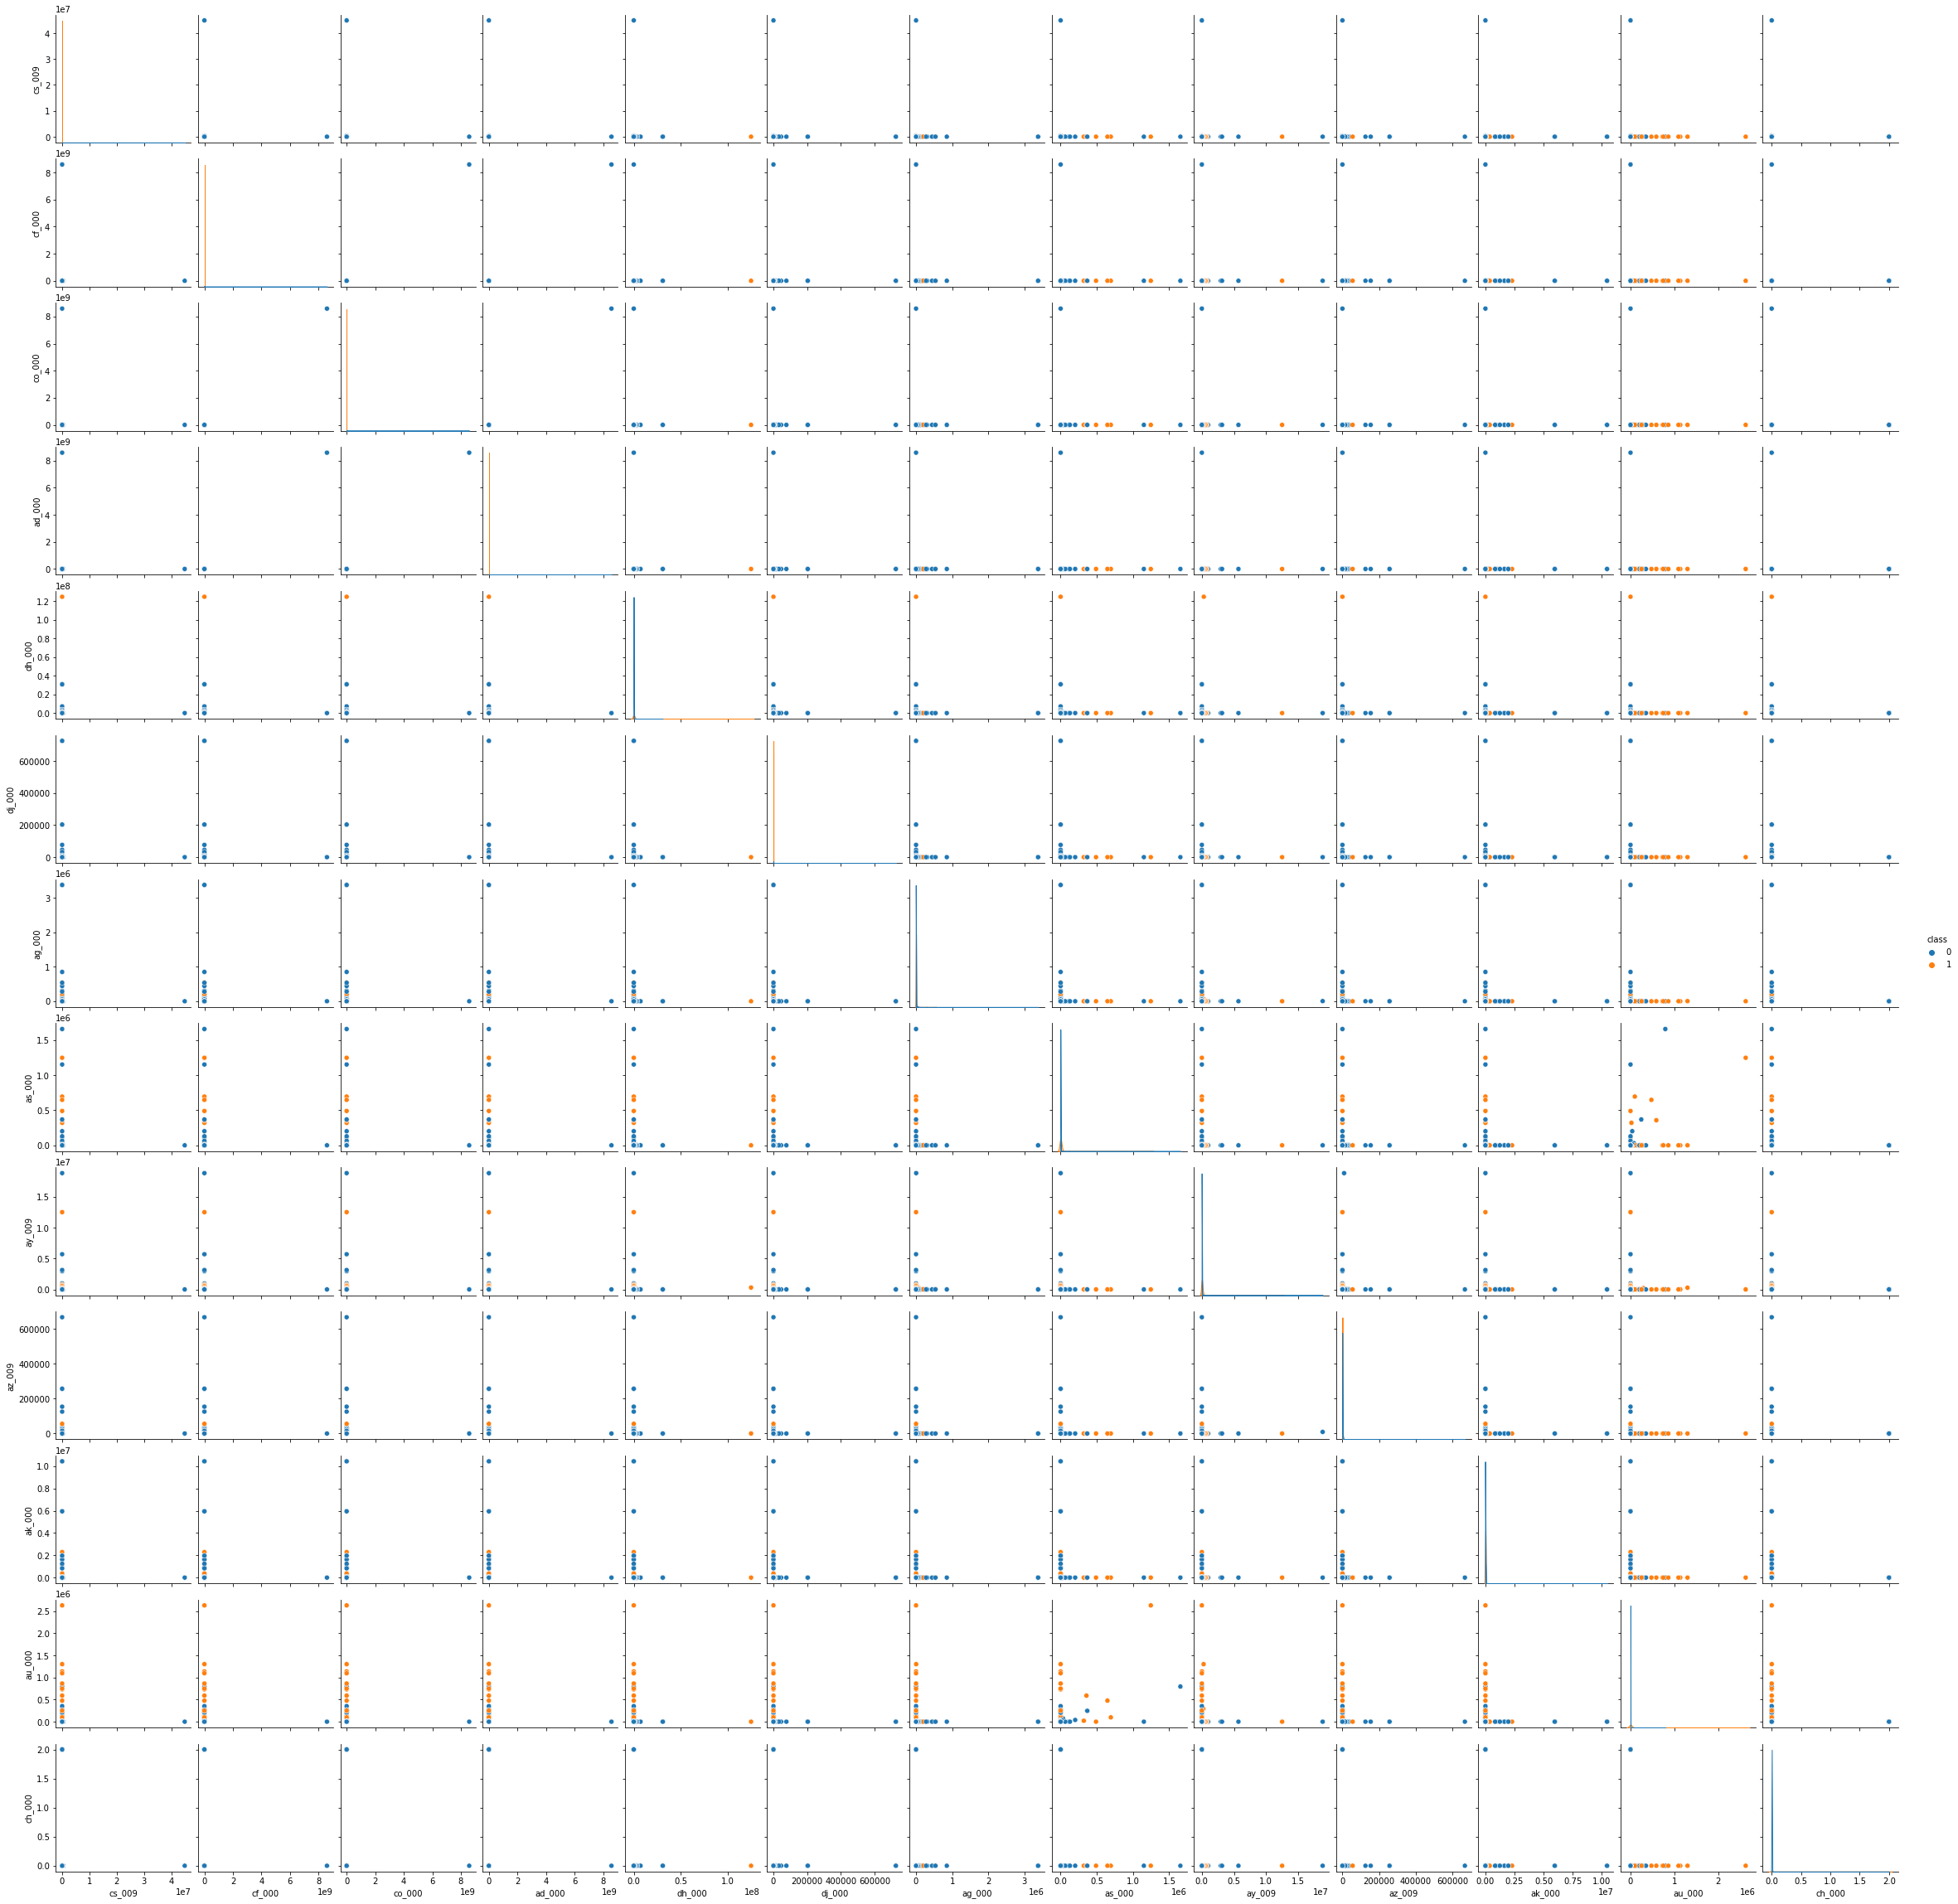

In [19]:
# pairplot of the selected features
sns.pairplot(data = temp_df_for_plot, hue = 'class')
plt.show()

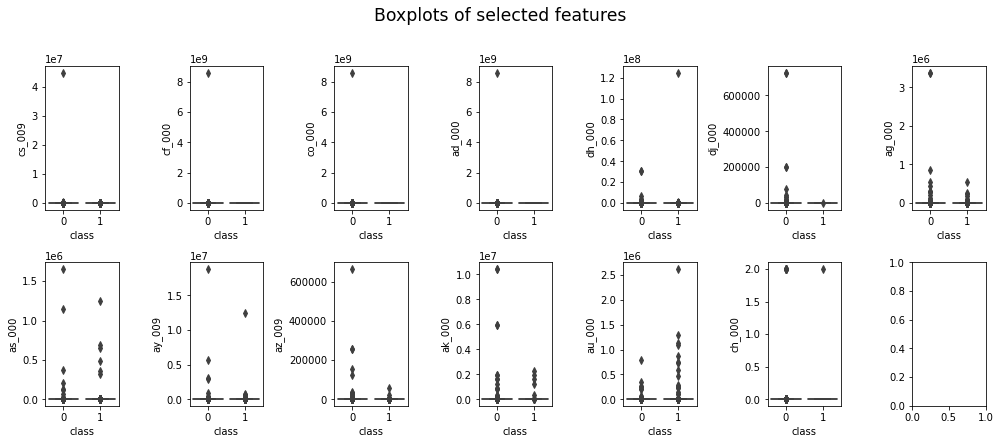

In [20]:
# boxplot of the selected features
fig, ax = plt.subplots(2, 7, figsize = (14, 6))

for i, col in enumerate(df_train_imp_X.loc[:, col_top13_cv]):
    sns.boxplot(ax = ax[math.floor(i / 7)][i % 7], data = temp_df_for_plot, y = col, x = 'class')

fig.suptitle('Boxplots of selected features', y = 1.02, fontsize = 'xx-large')
fig.tight_layout()    
plt.show()

> It is quite difficult to see from scatterplot and boxplot since most of the values of attributes are 0 and when they are non-zero, the values are very high. One thing noticed is the attribute au_000: instances with positive class tend to have high au_000 value - it can be a good feature for the classification problem

#### 1-(b)-v. Determine the number of positive and negative data. Is this data set imbalanced?

In [21]:
df_train_imp_y.value_counts()

0    59000
1     1000
Name: class, dtype: int64

> This dataset is imbalanced as the ratio of positive class to negative class is 1:59 (percentage of positive class is less than 2%)

## 1-(c). Train a random forest to classify the data set. Do NOT compensate for class imbalance in the data set. Calculate the confusion matrix, ROC, AUC, and misclassification for training and test sets and report them (You may use pROC package). Calculate Out of Bag error estimate for your random forset and compare it to the test error.

In [22]:
# use 5-fold CV to find the optimal hyperparameters: n_estimators, max_depth
# F1 metric is used to measure performance due to highly imbalanced class
# Stratified CV is used with GridSearch CV to prevent minor class not showing in some folds

params = {'n_estimators': [50, 100, 200],
         'max_depth': [2, 5, 10]}

cls_rf = RandomForestClassifier(random_state = 0)
cls_rf_cv = GridSearchCV(cls_rf, params, cv = 5, scoring = 'f1')
cls_rf_cv.fit(df_train_imp_X, df_train_imp_y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='f1')

In [23]:
cls_rf_cv.best_estimator_

RandomForestClassifier(max_depth=10, random_state=0)

In [24]:
# best RF classifier using n_estimators = 100, max_depth = 10
cls_rf_best = RandomForestClassifier(random_state = 0, oob_score = True, n_estimators = 100, max_depth = 10)
cls_rf_best.fit(df_train_imp_X, df_train_imp_y)

RandomForestClassifier(max_depth=10, oob_score=True, random_state=0)

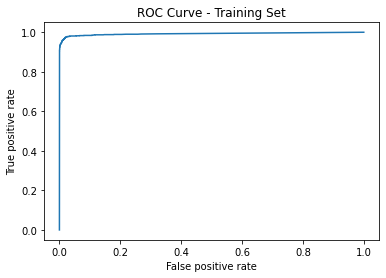

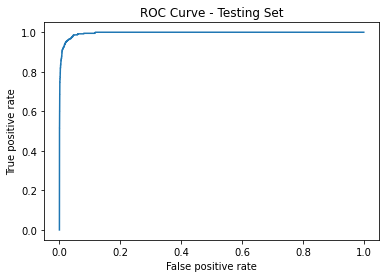

In [25]:
# ROC Curve for training and testing datasets

# function to plot roc curve
def plot_roc_curve(cls, X, y, title_name = 'ROC Curve'):
    fpr, tpr, thresholds = roc_curve(y, cls.predict_proba(X)[:, 1])
    plt.plot(fpr, tpr)
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title(title_name)
    plt.show()   
    
plot_roc_curve(cls_rf_best, df_train_imp_X, df_train_imp_y, title_name = 'ROC Curve - Training Set')
plot_roc_curve(cls_rf_best, df_test_imp_X, df_test_imp_y, title_name = 'ROC Curve - Testing Set')

In [26]:
# ROC AUC for training and testing datasets
print('ROC AUC score for training set:', '{0:.4%}'.format(roc_auc_score(df_train_imp_y, cls_rf_best.predict_proba(df_train_imp_X)[:,1])))
print('ROC AUC score for testing set:', '{0:.4%}'.format(roc_auc_score(df_test_imp_y, cls_rf_best.predict_proba(df_test_imp_X)[:,1])))
      

ROC AUC score for training set: 99.2481%
ROC AUC score for testing set: 99.5956%


In [27]:
# Misclassification for training and testing datasets
cls_rf_best_train_err = 1 - cls_rf_best.score(df_train_imp_X, df_train_imp_y)
cls_rf_best_test_err = 1 - cls_rf_best.score(df_test_imp_X, df_test_imp_y)

print('Misclassification rate of training set:', '{0:.4%}'.format(cls_rf_best_train_err))
print('Misclassification rate of testing set:', '{0:.4%}'.format(cls_rf_best_test_err))

Misclassification rate of training set: 0.2883%
Misclassification rate of testing set: 0.9000%


In [28]:
# Out of Bag Error
oob_error = 1 - cls_rf_best.oob_score_

print('Out of Bag Error:', '{0:.4%}'.format(oob_error))
print('Test Error', '{0:.4%}'.format(cls_rf_best_test_err))

Out of Bag Error: 0.6883%
Test Error 0.9000%


> Test error is slightly higher than OOB error. However, the small magnitude is also due to the highly imbalanced class

In [29]:
# Precision, Recall, and F1 score for training and testing datasets
print('Precision Score of training set:', '{0:.4%}'.format(precision_score(df_train_imp_y, cls_rf_best.predict(df_train_imp_X))))
print('Precision Score of testing set:', '{0:.4%}'.format(precision_score(df_test_imp_y, cls_rf_best.predict(df_test_imp_X))))

print('Recall Score of training set:', '{0:.4%}'.format(recall_score(df_train_imp_y, cls_rf_best.predict(df_train_imp_X))))
print('Recall Score of testing set:', '{0:.4%}'.format(recall_score(df_test_imp_y, cls_rf_best.predict(df_test_imp_X))))

print('F1 Score of training set:', '{0:.4%}'.format(f1_score(df_train_imp_y, cls_rf_best.predict(df_train_imp_X))))
print('F1 Score of testing set:', '{0:.4%}'.format(f1_score(df_test_imp_y, cls_rf_best.predict(df_test_imp_X))))


Precision Score of training set: 100.0000%
Precision Score of testing set: 93.5849%
Recall Score of training set: 82.7000%
Recall Score of testing set: 66.1333%
F1 Score of training set: 90.5309%
F1 Score of testing set: 77.5000%


## 1-(d). Research how class imbalance is addressed in random forests. Compensate for class imbalance in your random forest and repeat 2c. Compare the results with those of 2c.

#### 1st try: use 'balanced' class_weight to increase the weight of the minor class in RF

In [30]:
# use class_weight = 'balanced' in RF CLS
# RF classifier using n_estimators = 100, max_depth = 10
cls_rf_weighted = RandomForestClassifier(random_state = 0, class_weight = 'balanced', oob_score = True, n_estimators = 100, max_depth = 10)
cls_rf_weighted.fit(df_train_imp_X, df_train_imp_y)


RandomForestClassifier(class_weight='balanced', max_depth=10, oob_score=True,
                       random_state=0)

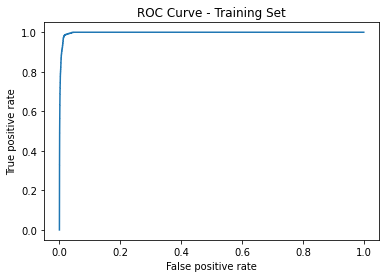

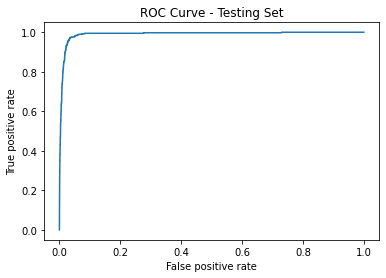

In [31]:
# ROC Curve for training and testing datasets
    
plot_roc_curve(cls_rf_weighted, df_train_imp_X, df_train_imp_y, title_name = 'ROC Curve - Training Set')
plot_roc_curve(cls_rf_weighted, df_test_imp_X, df_test_imp_y, title_name = 'ROC Curve - Testing Set')

In [32]:
# ROC AUC for training and testing datasets
print('ROC AUC score for training set:', '{0:.4%}'.format(roc_auc_score(df_train_imp_y, cls_rf_weighted.predict_proba(df_train_imp_X)[:,1])))
print('ROC AUC score for testing set:', '{0:.4%}'.format(roc_auc_score(df_test_imp_y, cls_rf_weighted.predict_proba(df_test_imp_X)[:,1])))
      

ROC AUC score for training set: 99.7391%
ROC AUC score for testing set: 99.0026%


In [33]:
# Misclassification for training and testing datasets
cls_rf_weighted_train_err = 1 - cls_rf_weighted.score(df_train_imp_X, df_train_imp_y)
cls_rf_weighted_test_err = 1 - cls_rf_weighted.score(df_test_imp_X, df_test_imp_y)

print('Misclassification rate of training set:', '{0:.4%}'.format(cls_rf_weighted_train_err))
print('Misclassification rate of testing set:', '{0:.4%}'.format(cls_rf_weighted_test_err))

Misclassification rate of training set: 1.8467%
Misclassification rate of testing set: 2.1563%


In [34]:
# Out of Bag Error
oob_error_weighted = 1 - cls_rf_weighted.oob_score_

print('Out of Bag Error:', '{0:.4%}'.format(oob_error_weighted))
print('Test Error', '{0:.4%}'.format(cls_rf_weighted_test_err))

Out of Bag Error: 2.1217%
Test Error 2.1563%


In [35]:
# Precision, Recall, and F1 score for training and testing datasets
print('Precision Score of training set:', '{0:.4%}'.format(precision_score(df_train_imp_y, cls_rf_weighted.predict(df_train_imp_X))))
print('Precision Score of testing set:', '{0:.4%}'.format(precision_score(df_test_imp_y, cls_rf_weighted.predict(df_test_imp_X))))

print('Recall Score of training set:', '{0:.4%}'.format(recall_score(df_train_imp_y, cls_rf_weighted.predict(df_train_imp_X))))
print('Recall Score of testing set:', '{0:.4%}'.format(recall_score(df_test_imp_y, cls_rf_weighted.predict(df_test_imp_X))))

print('F1 Score of training set:', '{0:.4%}'.format(f1_score(df_train_imp_y, cls_rf_weighted.predict(df_train_imp_X))))
print('F1 Score of testing set:', '{0:.4%}'.format(f1_score(df_test_imp_y, cls_rf_weighted.predict(df_test_imp_X))))


Precision Score of training set: 47.4063%
Precision Score of testing set: 52.3148%
Recall Score of training set: 98.7000%
Recall Score of testing set: 90.4000%
F1 Score of training set: 64.0493%
F1 Score of testing set: 66.2757%


#### 2nd try: using SMOTE for oversampling minority class

In [36]:
# use SMOTE on training set

cnt_class_1 = 20000

sm = SMOTE(sampling_strategy = {1: cnt_class_1})

df_train_imp_X_smote, df_train_imp_y_smote = sm.fit_resample(df_train_imp_X, df_train_imp_y)

In [37]:
# RF classifier using n_estimators = 100, max_depth = 10
cls_rf_smote = RandomForestClassifier(random_state = 0, oob_score = True, n_estimators = 100, max_depth = 10)
cls_rf_smote.fit(df_train_imp_X_smote, df_train_imp_y_smote)


RandomForestClassifier(max_depth=10, oob_score=True, random_state=0)

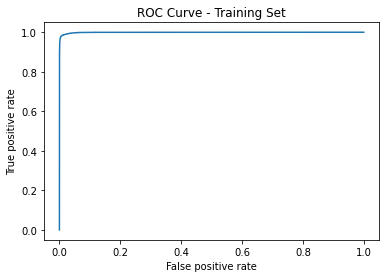

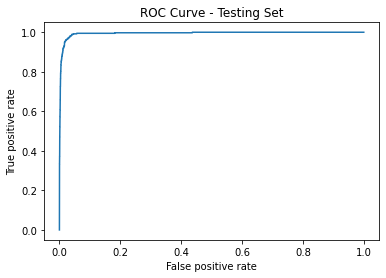

In [38]:
# ROC Curve for training and testing datasets
    
plot_roc_curve(cls_rf_smote, df_train_imp_X_smote, df_train_imp_y_smote, title_name = 'ROC Curve - Training Set')
plot_roc_curve(cls_rf_smote, df_test_imp_X, df_test_imp_y, title_name = 'ROC Curve - Testing Set')

In [39]:
# ROC AUC for training and testing datasets
print('ROC AUC score for training set:', '{0:.4%}'.format(roc_auc_score(df_train_imp_y_smote, cls_rf_smote.predict_proba(df_train_imp_X_smote)[:,1])))
print('ROC AUC score for testing set:', '{0:.4%}'.format(roc_auc_score(df_test_imp_y, cls_rf_smote.predict_proba(df_test_imp_X)[:,1])))
      

ROC AUC score for training set: 99.9188%
ROC AUC score for testing set: 99.4589%


In [40]:
# Misclassification for training and testing datasets
cls_rf_smote_train_err = 1 - cls_rf_smote.score(df_train_imp_X_smote, df_train_imp_y_smote)
cls_rf_smote_test_err = 1 - cls_rf_smote.score(df_test_imp_X, df_test_imp_y)

print('Misclassification rate of training set:', '{0:.4%}'.format(cls_rf_smote_train_err))
print('Misclassification rate of testing set:', '{0:.4%}'.format(cls_rf_smote_test_err))

Misclassification rate of training set: 1.0101%
Misclassification rate of testing set: 1.2500%


In [41]:
# Out of Bag Error
oob_error_smote = 1 - cls_rf_smote.oob_score_

print('Out of Bag Error:', '{0:.4%}'.format(oob_error_smote))
print('Test Error', '{0:.4%}'.format(cls_rf_smote_test_err))

Out of Bag Error: 1.4063%
Test Error 1.2500%


In [42]:
# Precision, Recall, and F1 score for training and testing datasets
print('Precision Score of training set:', '{0:.4%}'.format(precision_score(df_train_imp_y_smote, cls_rf_smote.predict(df_train_imp_X_smote))))
print('Precision Score of testing set:', '{0:.4%}'.format(precision_score(df_test_imp_y, cls_rf_smote.predict(df_test_imp_X))))

print('Recall Score of training set:', '{0:.4%}'.format(recall_score(df_train_imp_y_smote, cls_rf_smote.predict(df_train_imp_X_smote))))
print('Recall Score of testing set:', '{0:.4%}'.format(recall_score(df_test_imp_y, cls_rf_smote.predict(df_test_imp_X))))

print('F1 Score of training set:', '{0:.4%}'.format(f1_score(df_train_imp_y_smote, cls_rf_smote.predict(df_train_imp_X_smote))))
print('F1 Score of testing set:', '{0:.4%}'.format(f1_score(df_test_imp_y, cls_rf_smote.predict(df_test_imp_X))))


Precision Score of training set: 97.8519%
Precision Score of testing set: 67.6056%
Recall Score of training set: 98.1650%
Recall Score of testing set: 89.6000%
F1 Score of training set: 98.0082%
F1 Score of testing set: 77.0642%


> - Two approaches had been tried to address the imbalanced class problem: using class weight parameter in RF and apply SMOTE oversampling method to the training set to synthesize minority class
> - The first approach of using balanced class weight doesn't seem to work well as it performs worse than base model based on all evaluation metrics
> - When using SMOTE, it can be seen that the accuracy (1 - misclassification rate) and precision score are lower. However, the recall score is much better than the base model. The effect of better recall and worse precision are on a similar level and therefore causes F1-score to be at around the same level

## 1-(e). XGBoost and Model Trees
### In the case of a univariate tree, only one input dimension is used at a tree split. In a multivariate tree, or model tree, at a decision node all input dimensions can be used and thus it is more general. In univariate classification trees, majority polling is used at each node to determine the split of that node as the decision rule. In model trees, a (linear) model that relies on all of the variables is used to determine the split of that node (i.e. instead of using Xj > s as the decision rule, one has 􏰁j βjXj > s. as the decision rule). Alternatively, in a regression tree, instead of using average in the region associated with each node, a linear regression model is used to determine the value associated with that node.
### One of the methods that can be used at each node is Logistic Regression. Because the number of variables is large in this problem, one can use L1-penalized logistic regression at each node. You can use XGBoost to fit the model tree. Determine α (the regularization term) using cross-validation. Train the model for the APS data set without compensation for class imbalance. Use one of 5 fold, 10 fold, and leave-one-out cross validation methods to estimate the error of your trained model and compare it with the test error. Report the Confusion Matrix, ROC, and AUC for training and test sets.

In [44]:
# use 5-fold CV to find optimal alpha value on XGBoost CLS where LogReg is used at nodes
# use F1-score metric when finding optimal hyperparameter using GridSearchCV

params = {'alpha' : [1e-4, 1e-2, 1, 100, 10000]}
xgcls = xgb.XGBClassifier(objective = 'reg:logistic')
xgcls_cv = GridSearchCV(xgcls, params, cv = 5, scoring = 'f1')
xgcls_cv.fit(df_train_imp_X, df_train_imp_y)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None,
                                     objective='reg:logistic',
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
       

In [45]:
xgcls_cv.best_estimator_

XGBClassifier(alpha=0.0001, base_score=0.5, booster='gbtree',
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, objective='reg:logistic', random_state=0,
              reg_alpha=9.99999975e-05, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [46]:
# best XGBoost Classifier at alpha = 0.0001
xgcls_best = xgb.XGBClassifier(objective = 'reg:logistic', alpha = 0.0001)
xgcls_best.fit(df_train_imp_X, df_train_imp_y)

XGBClassifier(alpha=0.0001, base_score=0.5, booster='gbtree',
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, objective='reg:logistic', random_state=0,
              reg_alpha=9.99999975e-05, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [47]:
# Error for training and testing datasets
cls_rf_xgcls_train_err = 1 - xgcls_best.score(df_train_imp_X, df_train_imp_y)
cls_rf_xgcls_test_err = 1 - xgcls_best.score(df_test_imp_X, df_test_imp_y)

print('Error rate of training set:', '{0:.4%}'.format(cls_rf_xgcls_train_err))
print('Error rate of testing set:', '{0:.4%}'.format(cls_rf_xgcls_test_err))

Error rate of training set: 0.0017%
Error rate of testing set: 0.5938%


In [48]:
# Confusion metric for training and testing datasets
cm_train = confusion_matrix(df_train_imp_y, xgcls_best.predict(df_train_imp_X))
cm_test = confusion_matrix(df_test_imp_y, xgcls_best.predict(df_test_imp_X))
print('Confusion matrix of training set:\n', cm_train)
print('Confusion matrix of testing set:\n', cm_test)

Confusion matrix of training set:
 [[59000     0]
 [    1   999]]
Confusion matrix of testing set:
 [[15609    16]
 [   79   296]]


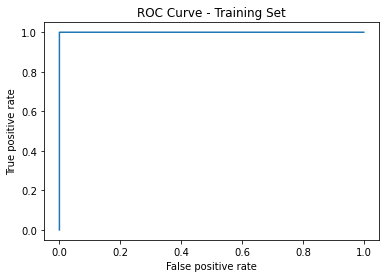

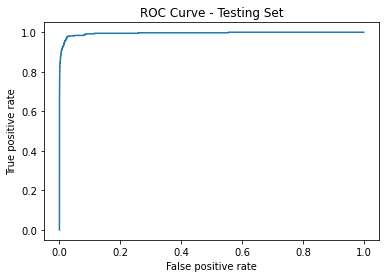

In [49]:
# ROC for training and testing datasets
plot_roc_curve(xgcls_best, df_train_imp_X, df_train_imp_y, title_name = 'ROC Curve - Training Set')
plot_roc_curve(xgcls_best, df_test_imp_X, df_test_imp_y, title_name = 'ROC Curve - Testing Set')

In [50]:
# ROC AUC for training and testing datasets
print('ROC AUC score for training set:', '{0:.4%}'.format(roc_auc_score(df_train_imp_y, xgcls_best.predict_proba(df_train_imp_X)[:,1])))
print('ROC AUC score for testing set:', '{0:.4%}'.format(roc_auc_score(df_test_imp_y, xgcls_best.predict_proba(df_test_imp_X)[:,1])))


ROC AUC score for training set: 100.0000%
ROC AUC score for testing set: 99.5054%


In [51]:
# Precision, Recall, and F1 score for training and testing datasets
print('Precision Score of training set:', '{0:.4%}'.format(precision_score(df_train_imp_y, xgcls_best.predict(df_train_imp_X))))
print('Precision Score of testing set:', '{0:.4%}'.format(precision_score(df_test_imp_y, xgcls_best.predict(df_test_imp_X))))

print('Recall Score of training set:', '{0:.4%}'.format(recall_score(df_train_imp_y, xgcls_best.predict(df_train_imp_X))))
print('Recall Score of testing set:', '{0:.4%}'.format(recall_score(df_test_imp_y, xgcls_best.predict(df_test_imp_X))))

print('F1 Score of training set:', '{0:.4%}'.format(f1_score(df_train_imp_y, xgcls_best.predict(df_train_imp_X))))
print('F1 Score of testing set:', '{0:.4%}'.format(f1_score(df_test_imp_y, xgcls_best.predict(df_test_imp_X))))


Precision Score of training set: 100.0000%
Precision Score of testing set: 94.8718%
Recall Score of training set: 99.9000%
Recall Score of testing set: 78.9333%
F1 Score of training set: 99.9500%
F1 Score of testing set: 86.1718%


## 1-(f). Use SMOTE (Synthetic Minority Over-sampling Technique) to pre-process your data to compensate for class imbalance.4 Train XGBosst with L1-penalized lo- gistic regression at each node using the pre-processed data and repeat 2e. Do not forget that there is a right and a wrong way of cross validation here. Compare the uncompensated case with SMOTE case.

In [70]:
# 5-fold CV to find optimal parameter alpha
skf = StratifiedKFold(n_splits = 5)
alpha_list = [1e-4, 1e-2, 1, 100, 10000]
cnt_class_1 = 16000
df_result = pd.DataFrame(columns = ['fold', 'alpha', 'train_f1', 'cv_f1'])


# 5 iterations for 5 fold CV
for fold, (train_index, cv_index) in enumerate(skf.split(df_train_imp_X, df_train_imp_y), 1):
    X_train = df_train_imp_X.loc[train_index, :]
    y_train = df_train_imp_y[train_index] 
    X_cv = df_train_imp_X.loc[cv_index, :]
    y_cv = df_train_imp_y[cv_index] 
    
    # oversample train data of each CV iteration using SMOTE (leave CV fold the same)
    sm = SMOTE(sampling_strategy = {1: cnt_class_1})
    X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)
    
    print('iteration fold:', fold)
    
    for alp in alpha_list:
        temp_xgcls = xgb.XGBClassifier(objective = 'reg:logistic', alpha = alp)
        temp_xgcls.fit(X_train_smote, y_train_smote)
        
        # use F1-score to find optimal param
        train_f1 = f1_score(y_train_smote, temp_xgcls.predict(X_train_smote))
        cv_f1 = f1_score(y_cv, temp_xgcls.predict(X_cv))
        
        # record results in df_result
        df_result.loc[len(df_result), :] = [fold, alp, train_f1, cv_f1]
        
        

iteration fold: 1
iteration fold: 2
iteration fold: 3
iteration fold: 4
iteration fold: 5


In [71]:
# find best alpha value when training XGBoost Classifier using SMOTE data
df_result = df_result.astype(float)
grouped_result = df_result.groupby('alpha')['train_f1', 'cv_f1'].mean()
print(grouped_result.sort_values(['cv_f1', 'train_f1'], ascending = [False, False]))

            train_f1     cv_f1
alpha                         
1.0000      0.999969  0.818989
0.0100      0.999975  0.811550
0.0001      0.999975  0.810092
100.0000    0.975225  0.674642
10000.0000  0.000000  0.000000


<ipython-input-71-5031b383435e>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grouped_result = df_result.groupby('alpha')['train_f1', 'cv_f1'].mean()


In [72]:
# best XGBoost with alpha = 1
xgcls_best_smote = xgb.XGBClassifier(objective = 'reg:logistic', alpha = 1)

# oversample test data using SMOTE
cnt_class_1 = 20000

sm = SMOTE(sampling_strategy = {1: cnt_class_1})

df_train_imp_X_smote, df_train_imp_y_smote = sm.fit_resample(df_train_imp_X, df_train_imp_y)

# fit XGBoost
xgcls_best_smote.fit(df_train_imp_X_smote, df_train_imp_y_smote)

XGBClassifier(alpha=1, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='reg:logistic', random_state=0, reg_alpha=1,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [73]:
# Error for training and testing datasets
cls_rf_xgcls_smote_train_err = 1 - xgcls_best_smote.score(df_train_imp_X_smote, df_train_imp_y_smote)
cls_rf_xgcls_smote_test_err = 1 - xgcls_best_smote.score(df_test_imp_X, df_test_imp_y)

print('Error rate of training set:', '{0:.4%}'.format(cls_rf_xgcls_smote_train_err))
print('Error rate of testing set:', '{0:.4%}'.format(cls_rf_xgcls_smote_test_err))

Error rate of training set: 0.0025%
Error rate of testing set: 0.6563%


In [74]:
# Confusion metric for training and testing datasets
cm_train_smote = confusion_matrix(df_train_imp_y_smote, xgcls_best_smote.predict(df_train_imp_X_smote))
cm_test_smote = confusion_matrix(df_test_imp_y, xgcls_best_smote.predict(df_test_imp_X))
print('Confusion matrix of training set:\n', cm_train_smote)
print('Confusion matrix of testing set:\n', cm_test_smote)

Confusion matrix of training set:
 [[59000     0]
 [    2 19998]]
Confusion matrix of testing set:
 [[15588    37]
 [   68   307]]


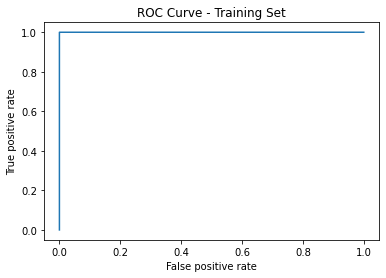

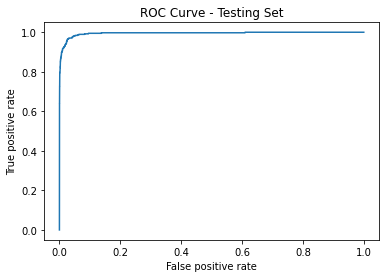

In [75]:
# ROC for training and testing datasets
plot_roc_curve(xgcls_best_smote, df_train_imp_X_smote, df_train_imp_y_smote, title_name = 'ROC Curve - Training Set')
plot_roc_curve(xgcls_best_smote, df_test_imp_X, df_test_imp_y, title_name = 'ROC Curve - Testing Set')


In [76]:
# ROC AUC for training and testing datasets
print('ROC AUC score for training set:', '{0:.4%}'.format(roc_auc_score(df_train_imp_y_smote, xgcls_best_smote.predict_proba(df_train_imp_X_smote)[:,1])))
print('ROC AUC score for testing set:', '{0:.4%}'.format(roc_auc_score(df_test_imp_y, xgcls_best_smote.predict_proba(df_test_imp_X)[:,1])))


ROC AUC score for training set: 100.0000%
ROC AUC score for testing set: 99.4736%


In [77]:
# Precision, Recall, and F1 score for training and testing datasets
print('Precision Score of training set:', '{0:.4%}'.format(precision_score(df_train_imp_y_smote, xgcls_best_smote.predict(df_train_imp_X_smote))))
print('Precision Score of testing set:', '{0:.4%}'.format(precision_score(df_test_imp_y, xgcls_best_smote.predict(df_test_imp_X))))

print('Recall Score of training set:', '{0:.4%}'.format(recall_score(df_train_imp_y_smote, xgcls_best_smote.predict(df_train_imp_X_smote))))
print('Recall Score of testing set:', '{0:.4%}'.format(recall_score(df_test_imp_y, xgcls_best_smote.predict(df_test_imp_X))))

print('F1 Score of training set:', '{0:.4%}'.format(f1_score(df_train_imp_y_smote, xgcls_best_smote.predict(df_train_imp_X_smote))))
print('F1 Score of testing set:', '{0:.4%}'.format(f1_score(df_test_imp_y, xgcls_best_smote.predict(df_test_imp_X))))


Precision Score of training set: 100.0000%
Precision Score of testing set: 89.2442%
Recall Score of training set: 99.9900%
Recall Score of testing set: 81.8667%
F1 Score of training set: 99.9950%
F1 Score of testing set: 85.3964%


> - Similar to the case of RF (base vs SMOTE), for XGBoost, when trained using SMOTE (oversample minority class), the accuracy and precision is lower than the base XGBoost model. On the other hand, recall improves. This results in similar value of F1-score as both effects cancel out.

# 2. ISLR 6.6.3

> For Lasso, when s is increased from 0 (alpha starts from big value)
> - (a) Train RSS: When s increases, the coefficient of the Lasso model becomes larger and the model will then become lease squares regression when s is large enough. This reduces the variance (increases flexibility) and therefore Train RSS decreases <b>(ANS: iv. Steadily decrease)</b>
> - (b) Test RSS: As s increases, the reduction in bias outweighs the increase in variance initially and therefore lead to a decreasing Test RSS. After some point (sweet spot), the model will become overfit where variance grows faster than a reduction in bias and causes Test RSS to increase again <b> (ANS: ii. Decrease initially, and eventually start increasing in U shape) </b>
> - (c) Variance: The flexibility of the model increases as s increases, and therefore causes variance to increase. However, when s is large enough that the model becomes least squares regression, the variance will remain constant <b>(ANS: iii. Steadily increase)</b>
> - (d) (Squared) Bias: Similar to variance, bias will decrease when the model's flexibility increases as s increases and it will stop decreasing at a point where the model become least squares regression <b>(ANS: iv. Steadily decrease)</b>
> - (e) Irreducible error: irreducible error is independent from the model and therefore will remain constant no matter how s changes <b>(ANS: v. Remain constant)</b>

# 3. ISLR 6.6.5

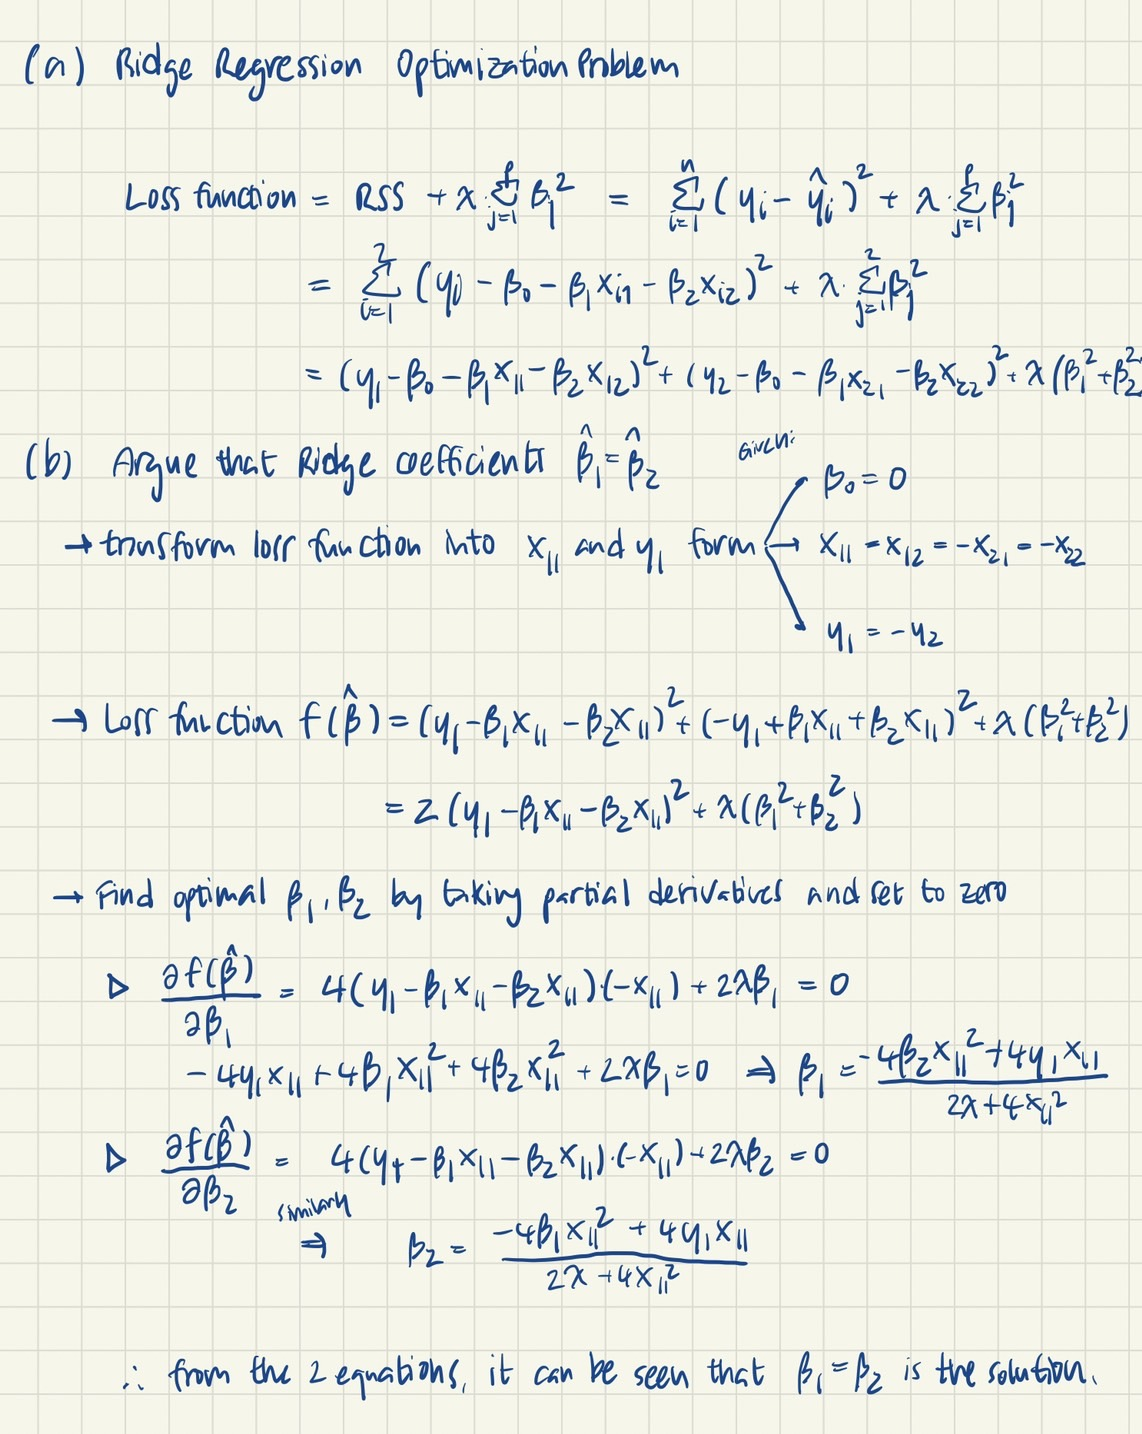

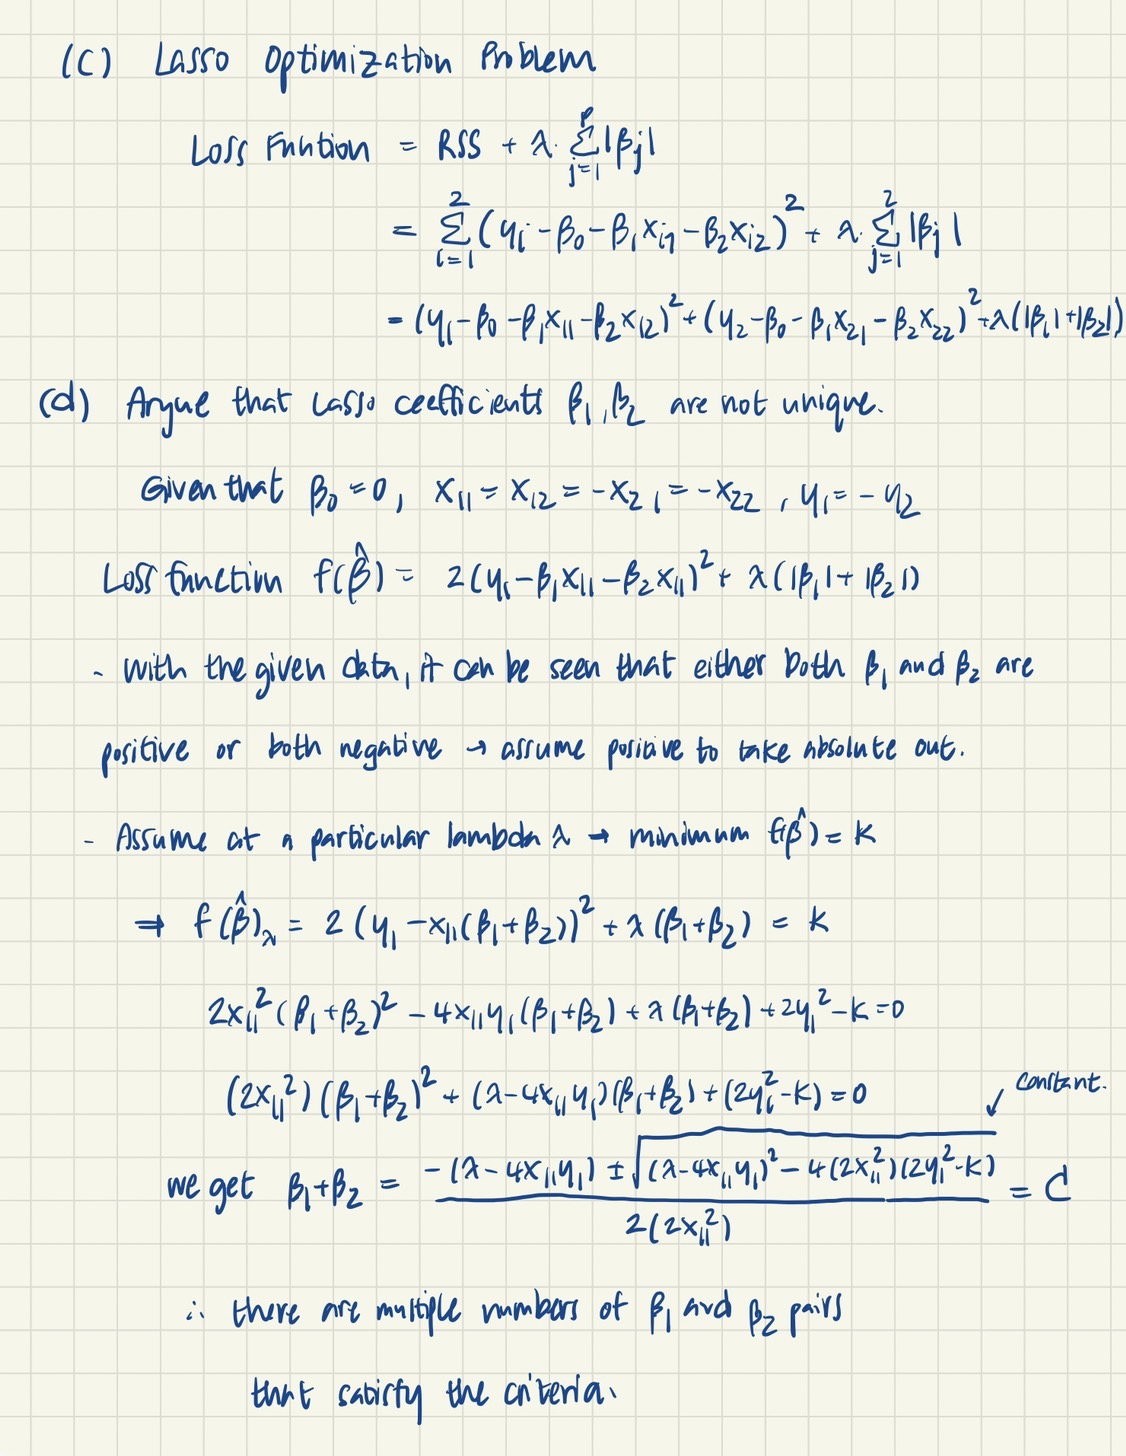

# 4. ISLR 8.4.5

> - With the threshold of 0.5, the first 4 estimates will be classified as Green while the other 6 will be classified as Red. With majority voting, Red will be predicted.
> - The average probability of P(Class is Red|X) is (0.1+0.15+0.2+0.2+0.55+0.6+0.6+0.65+0.7+0.75)/10 = 0.45. With the threshold of 0.5, it will be classified as class Green.

# 5. ISLR 9.7.3

#### (a) Sketch the observations

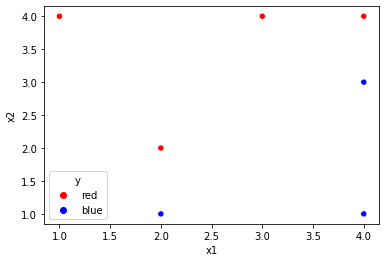

In [61]:
# create dataframe
df_svm = pd.DataFrame({'x1':[3,2,4,1,2,4,4], 
                       'x2':[4,2,4,4,1,3,1], 
                       'y':['red','red','red','red','blue','blue','blue']})

# scatterplot of data
sns.scatterplot(data = df_svm, x = 'x1', y = 'x2', hue = 'y', palette = {'red':'red', 'blue':'blue'})
plt.show()

#### (b) Sketch the hyperplane and its equation

In [62]:
from sklearn.svm import LinearSVC

In [63]:
svm = LinearSVC(C = 100000)
svm.fit(df_svm.loc[:, ['x1', 'x2']], df_svm.loc[:, 'y'])

LinearSVC(C=100000)

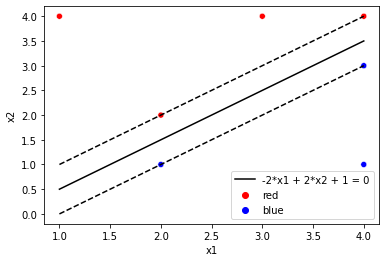

In [64]:
# get the separating hyperplane
w = svm.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(1, 4)
yy = a * xx - (svm.intercept_[0]) / w[1]

# plot the parallels to the separating hyperplane that pass through the
# support vectors (margin away from hyperplane in direction
# perpendicular to hyperplane). This is sqrt(1+a^2) away vertically in
# 2-d.
margin = 1 / np.sqrt(np.sum(svm.coef_ ** 2))
yy_down = yy - np.sqrt(1 + a ** 2) * margin
yy_up = yy + np.sqrt(1 + a ** 2) * margin

# plot the line, the points, and the nearest vectors to the plane
sns.scatterplot(data = df_svm, x = 'x1', y = 'x2', hue = 'y', palette = {'red':'red', 'blue':'blue'})
plt.plot(xx, yy, "k-", label = '-2*x1 + 2*x2 + 1 = 0')
plt.plot(xx, yy_down, "k--")
plt.plot(xx, yy_up, "k--")
plt.legend()
plt.show()

#### (c) Describe the classification rule

> The classification rule from the separating hyperplane is:
> - When -2*x1 + 2*x2 + 1 > 0 then classify as RED
> - When -2*x1 + 2*x2 + 1 < 0 then classify as BLUE

#### (d) indicate the maximal margin of the hyperplane

In [65]:
# margin is minimum distance from the data points to the separating hyperplane
# distance from (x1, y1) to line ax + by + c = 0 is abs(ax1 + by1 +c)/sqrt(a**2 + b**2)
min(abs(-2*df_svm.loc[:, 'x1'] + 2*df_svm.loc[:, 'x2'] + 1) / 2)

0.5

#### (e) Indicate the support vectors of maximal margin classifier

In [66]:
# get support vectors from data whose distance to separating hyperplane <= margin
support_vectors_indices = list((abs(-2*df_svm.loc[:, 'x1'] + 2*df_svm.loc[:, 'x2'] + 1) / 2) <= 0.5)
support_vectors = df_svm[support_vectors_indices]
print('The support vector are the following data points:', support_vectors, sep = '\n')

The support vector are the following data points:
   x1  x2     y
1   2   2   red
2   4   4   red
4   2   1  blue
5   4   3  blue


#### (f) argue that slight movement of 7th observation doesn't affect hyperplane

> Since the seventh data point is not a support vector for this classification problem, the movement of it doesn't affect the hyperplane as the hyperplane is built upon the locations of the support vectors

#### (g) Sketch hyperplane that is not optimal

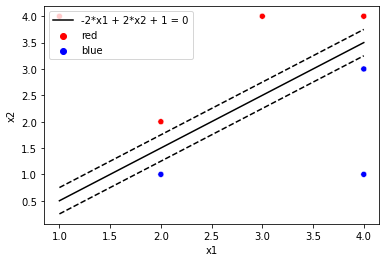

In [67]:
# plot the parallels to the separating hyperplane that pass through the
# support vectors (margin away from hyperplane in direction
# perpendicular to hyperplane). This is sqrt(1+a^2) away vertically in
# 2-d.
margin = 1 / np.sqrt(np.sum(svm.coef_ ** 2))
yy_down = yy - np.sqrt(1 + a ** 2) * margin / 2
yy_up = yy + np.sqrt(1 + a ** 2) * margin / 2

# plot the line, the points, and the nearest vectors to the plane
sns.scatterplot(data = df_svm, x = 'x1', y = 'x2', hue = 'y', palette = {'red':'red', 'blue':'blue'})
plt.plot(xx, yy, "k-", label = '-2*x1 + 2*x2 + 1 = 0')
plt.plot(xx, yy_down, "k--")
plt.plot(xx, yy_up, "k--")
plt.legend()
plt.show()

#### (h) Draw additional observation so that hyperplane can't perfectly separate two classes

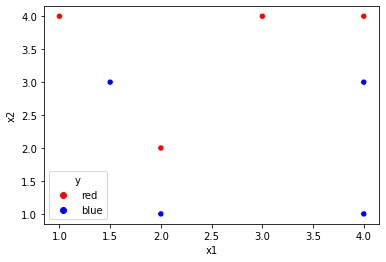

In [68]:
df_svm.loc[len(df_svm), :] = [1.5, 3, 'blue']

# scatterplot with added data
sns.scatterplot(data = df_svm, x = 'x1', y = 'x2', hue = 'y', palette = {'red':'red', 'blue':'blue'})
plt.show()